In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('C:\\Users\\user\\kaggle_playground\\data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import torch
import numpy as np

In [5]:
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

In [6]:
tensor = torch.ones(4, 4)
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [7]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [8]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [9]:
agg = tensor.sum()
agg_item = agg.item()  
print(agg_item, type(agg_item))

12.0 <class 'float'>


In [10]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [11]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [12]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [4]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

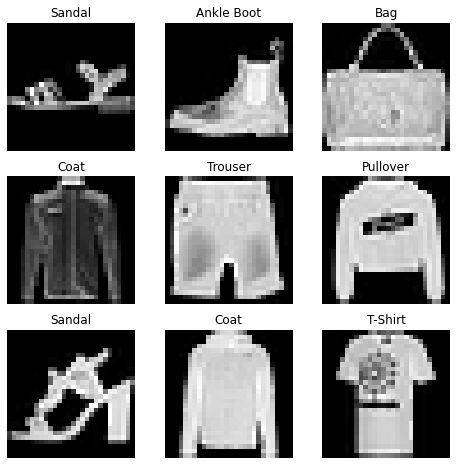

In [5]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):  # 1-9
    sample_idx = torch.randint(len(training_data), size=(1,)).item() # random sample
    img, label = training_data[sample_idx] # get image and label
    figure.add_subplot(rows, cols, i) # add subplot
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [6]:
import os
import pandas as pd
import numpy as np
import torchvision as tvio
# A custom Dataset class must implement three functions: __init__, __len__, and __getitem__. 
# Take a look at this implementation; the FashionMNIST images are stored in a directory img_dir, 
#  their labels are stored separately in a CSV file 

class CustomImageDataset (Dataset):
    def __init__(self, img_dir, annotations_file, transform=None,target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

        def __len__(self):
            return len(self.img_labels)

        def __getitem__(self, idx):
            img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
            image = tvio.read_image(img_path)
            label = self.img_labels.iloc[idx, 1]
            if self.transform:
                image = self.transform(image)
            
            if self.target_transform:
                label = self.target_transform(label)
            sample = {'image': image, 'label': label}    
            return sample

In [7]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloadeer = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Label batch shape: torch.Size([64])
Image shape: torch.Size([28, 28])


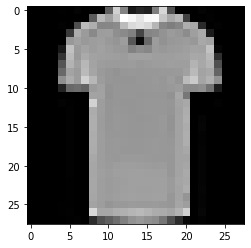

Label: 0


In [8]:
#Display the first batch of images
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Label batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
print(f"Image shape: {img.size()}")
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")


In [9]:
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor,Lambda
ds = datasets.FashionMNIST(root="data", train=True, download=True, transform=ToTensor(),target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)))

In [10]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


In [14]:
#We define our neural network by subclassing nn.Module, and 
# initialize the neural network layers in __init__. Every nn.Module subclass implements the operations 
# on input data in the forward method.
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [15]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [16]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X) 
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([1])


In [20]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [21]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [22]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0192, -0.0098,  0.0090,  ..., -0.0154,  0.0273,  0.0252],
        [ 0.0334,  0.0204, -0.0290,  ..., -0.0173, -0.0095,  0.0089]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0158, 0.0023], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0027, -0.0361,  0.0349,  ...,  0.0098, -0.0147, -0.0018],
        [-0.0370, -0.0254, -0.0175,  ...,  0.0434, -0.0170,  0.0376]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu

In [23]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [24]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [25]:
#We define train_loop that loops over our optimization code, 
# and test_loop that evaluates the model's performance against our test data.

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):        
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [26]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.303627  [    0/60000]
loss: 2.297970  [ 6400/60000]
loss: 2.283129  [12800/60000]
loss: 2.278689  [19200/60000]
loss: 2.258325  [25600/60000]
loss: 2.251705  [32000/60000]
loss: 2.248329  [38400/60000]
loss: 2.225578  [44800/60000]
loss: 2.214946  [51200/60000]
loss: 2.217750  [57600/60000]
Test Error: 
 Accuracy: 53.0%, Avg loss: 0.034451 

Epoch 2
-------------------------------
loss: 2.189737  [    0/60000]
loss: 2.192495  [ 6400/60000]
loss: 2.138877  [12800/60000]
loss: 2.166987  [19200/60000]
loss: 2.110480  [25600/60000]
loss: 2.085699  [32000/60000]
loss: 2.123595  [38400/60000]
loss: 2.051481  [44800/60000]
loss: 2.048006  [51200/60000]
loss: 2.055054  [57600/60000]
Test Error: 
 Accuracy: 54.7%, Avg loss: 0.031395 

Epoch 3
-------------------------------
loss: 2.002957  [    0/60000]
loss: 2.001682  [ 6400/60000]
loss: 1.877964  [12800/60000]
loss: 1.961728  [19200/60000]
loss: 1.843978  [25600/60000]
loss: 1.802163  [32000/600

In [27]:
import torch
import torch.onnx as onnx
import torchvision.models as models

In [28]:
model = models.vgg16(pretrained=True)
torch.save(model.state_dict(), 'data/model_weights.pth')

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/azureuser/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [30]:
torch.save(model.state_dict(), "data/model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [31]:
model = NeuralNetwork()
model.load_state_dict(torch.load("data/model.pth"))

<All keys matched successfully>

In [32]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Coat", Actual: "Ankle boot"
